Lamda function fitting procedure.
In an effort to identify a simple and adaptable fitting process for noisy data, we used a lambda operator.
The lambda operator or lambda function is used for creating small, one-time and anonymous (having no name) function objects in Python. The lambda operator can have any number of arguments, but it can have only one expression. It cannot contain any statements and it returns a function object which can be assigned to any variable.

As a test case, we made some noisy data to test our approach: 

In [1]:
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

We start with sinusiodal functions

$tX = 11.86*\cos(\frac{2\pi}{0.81}*t-1.32)$

and

$tY = -32.14*\cos(\frac{2\pi}{0.80}*t-1.94)$

and then add random Gaussian distributed noise with an additional weak linear trend.

In [2]:
# Generate data points with noise
num_points = 150
Tx = np.linspace(5., 8., num_points)
Ty = Tx

tX = 11.86*np.cos(2*pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))
tY = -32.14*np.cos(2*np.pi/0.8*Ty-1.94) + 0.15*Ty+7*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))


In order to apply the optimize least squares regression package from scipy we will define our $fitfunc$ and our $errfunc$ as indicated and provide an initial guess, $p0$.

In [11]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

The array, $p1$ stores the best fit falues of the parameters (amplitude of the sinusoid, period of the sinusoid, phase shift of the sinusoid and slope of the linear term) and then we can plot the experimental data as well as the fit.

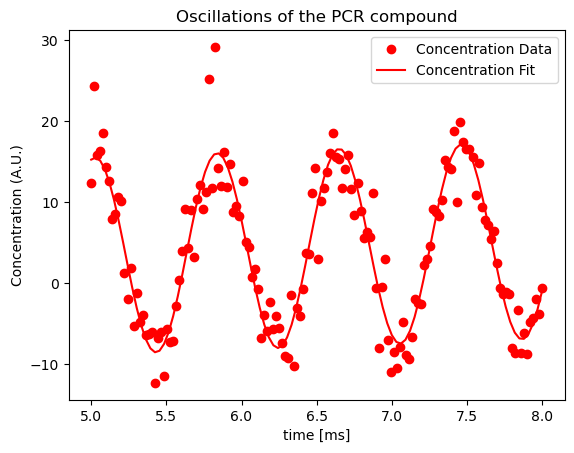

In [15]:
time = np.linspace(Tx.min(), Tx.max(), 100)
plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit
plt.title("Oscillations of the PCR compound")
plt.xlabel("time [ms]")
plt.ylabel("Concentration (A.U.)")
plt.legend(('Concentration Data', 'Concentration Fit'))

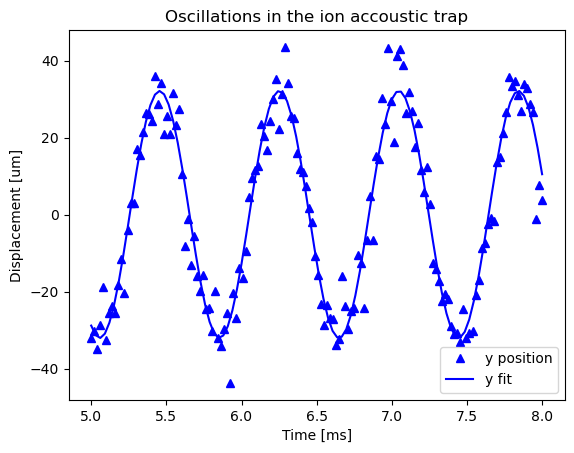

In [18]:
# Fit the second set
p0 = [-15., 0.8, 0., -1.]
p2,success = optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = np.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

# Legend the plot
plt.title("Oscillations in the ion accoustic trap")
plt.xlabel("Time [ms]")
plt.ylabel("Displacement [um]")
plt.legend(('y position', 'y fit'))



As a first step, we would use this approach to determine if a three parameter fit might be appropriate and then explore other models and use a cross-validation to explore these approaches.  The parameter arrays might also be printed as needed:

In [24]:
print("P1 Amplitude, Period, Phase Shift, Linear Term")
print(p1)
print("P2 Amplitude, Period, Phase Shift, Linear Term")
print(p2)

P1 Amplitude, Period, Phase Shift, Linear Term
[-12.17527704   0.81171287   1.93592751   0.66238235]
P2 Amplitude, Period, Phase Shift, Linear Term
[-3.20814124e+01  7.95921702e-01 -2.22426817e+00  5.23112467e-03]
